In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import plotly.graph_objects as go

In [5]:
bjp = pd.read_excel("1.bjp_general.xlsx")

In [6]:
congress = pd.read_excel("2.congress_general.xlsx")

In [7]:
dmk = pd.read_excel("3.dmk_general.xlsx")

In [8]:
aitmc = pd.read_excel("4.aitmc_general.xlsx")

In [9]:
ysrcp = pd.read_excel("5.ysrcp_general.xlsx")

In [10]:
shivsena = pd.read_excel("6.shivsena_general.xlsx")

In [11]:
jdu = pd.read_excel("7.jdu_general.xlsx")

In [12]:
bjd = pd.read_excel("8.bjd_general.xlsx")

In [13]:
bsp = pd.read_excel("9.bsp_general.xlsx")

In [14]:
trs = pd.read_excel("10.trs_general.xlsx")

In [15]:
bjp.head()

,Created-At,From-User,From-User-Id,To-User,To-User-Id,Language,Source,Text,Geo-Location-Latitude,Geo-Location-Longitude,Retweet-Count,Id,polarity(Text),confidence(Text),agreement(Text),subjectivity(Text),irony(Text)
0,2020-12-06 02:10:36,ANI,355989081,NaN,-1,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",I would have still been the chief minister if ...,NaN,NaN,2048,1335323208136810496,NEU,94,DISAGREEMENT,SUBJECTIVE,NONIRONIC
1,2020-12-04 20:34:25,Amit Shah,1447949844,NaN,-1,en,"<a href=""http://twitter.com/download/iphone"" r...",Gratitude to the people of Telangana for repos...,NaN,NaN,5852,1334876218622050304,P,100,AGREEMENT,OBJECTIVE,NONIRONIC
2,2020-12-05 13:41:22,BJP,207809313,NaN,-1,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",We thank the people of Hyderabad for showing t...,NaN,NaN,973,1335134658187554817,P,100,AGREEMENT,SUBJECTIVE,NONIRONIC
3,2020-12-06 16:21:48,RAJAN,158374641,MulkaPraveen,1246129977000513538,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@MulkaPraveen @bandisanjay_bjp @narendramodi @...,NaN,NaN,0,1335537421178454016,NONE,100,AGREEMENT,OBJECTIVE,NONIRONIC
4,2020-12-06 16:21:43,Kanoon Sangrah,1229737514283307008,NaN,-1,en,"<a href=""http://twitter.com/download/android"" ...","Actor Vijayashanthi quits Congress, to join BJ...",NaN,NaN,0,1335537398206222344,P,100,AGREEMENT,OBJECTIVE,NONIRONIC


In [5]:
bjp = bjp.drop(columns = ['From-User-Id','To-User','To-User-Id','Geo-Location-Latitude','Geo-Location-Longitude','Id'])

In [6]:
congress = congress.drop(columns = ['From-User-Id','To-User','To-User-Id','Geo-Location-Latitude','Geo-Location-Longitude','Id'])

In [7]:
dmk = dmk.drop(columns = ['From-User-Id','To-User','To-User-Id','Geo-Location-Latitude','Geo-Location-Longitude','Id'])

In [16]:
aitmc = aitmc.drop(columns = ['From-User-Id','To-User','To-User-Id','Geo-Location-Latitude','Geo-Location-Longitude','Id'])

In [17]:
ysrcp = ysrcp.drop(columns = ['From-User-Id','To-User','To-User-Id','Geo-Location-Latitude','Geo-Location-Longitude','Id'])

In [18]:
shivsena = shivsena.drop(columns = ['From-User-Id','To-User','To-User-Id','Geo-Location-Latitude','Geo-Location-Longitude','Id'])

In [19]:
jdu = jdu.drop(columns = ['From-User-Id','To-User','To-User-Id','Geo-Location-Latitude','Geo-Location-Longitude','Id'])

In [20]:
bjd = bjd.drop(columns = ['From-User-Id','To-User','To-User-Id','Geo-Location-Latitude','Geo-Location-Longitude','Id'])

In [21]:
bsp = bsp.drop(columns = ['From-User-Id','To-User','To-User-Id','Geo-Location-Latitude','Geo-Location-Longitude','Id'])

In [22]:
dmk = dmk.drop(columns = ['From-User-Id','To-User','To-User-Id','Geo-Location-Latitude','Geo-Location-Longitude','Id'])

In [23]:
bjp.loc[:,'candidate'] = 'bjp'
congress.loc[:,'candidate'] = 'congress'
dmk.loc[:,'candidate'] = 'dmk'
aitmc.loc[:,'candidate'] = 'aitmc'
ysrcp.loc[:,'candidate'] = 'ysrcp'
shivsena.loc[:,'candidate'] = 'shivsena'
jdu.loc[:,'candidate'] = 'jdu'
bjd.loc[:,'candidate'] = 'bjd'
bsp.loc[:,'candidate'] = 'bsp'
trs.loc[:,'candidate'] = 'trs'

In [26]:
Data_Mixed = pd.concat([bjp, congress, dmk, aitmc, ysrcp, shivsena, jdu, bjd, bsp, trs], sort=True)
Data_Mixed.sort_values(by='Created-At')
Data_Mixed.head()

,Created-At,From-User,From-User-Id,Geo-Location-Latitude,Geo-Location-Longitude,Id,Language,Retweet-Count,Source,Text,To-User,To-User-Id,agreement(Text),candidate,confidence(Text),irony(Text),polarity(Text),subjectivity(Text)
0,2020-12-06 02:10:36,ANI,3.559891e+08,NaN,NaN,1.335323e+18,en,2048,"<a href=""https://mobile.twitter.com"" rel=""nofo...",I would have still been the chief minister if ...,NaN,-1.000000e+00,DISAGREEMENT,bjp,94,NONIRONIC,NEU,SUBJECTIVE
1,2020-12-04 20:34:25,Amit Shah,1.447950e+09,NaN,NaN,1.334876e+18,en,5852,"<a href=""http://twitter.com/download/iphone"" r...",Gratitude to the people of Telangana for repos...,NaN,-1.000000e+00,AGREEMENT,bjp,100,NONIRONIC,P,OBJECTIVE
2,2020-12-05 13:41:22,BJP,2.078093e+08,NaN,NaN,1.335135e+18,en,973,"<a href=""https://mobile.twitter.com"" rel=""nofo...",We thank the people of Hyderabad for showing t...,NaN,-1.000000e+00,AGREEMENT,bjp,100,NONIRONIC,P,SUBJECTIVE
3,2020-12-06 16:21:48,RAJAN,1.583746e+08,NaN,NaN,1.335537e+18,en,0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@MulkaPraveen @bandisanjay_bjp @narendramodi @...,MulkaPraveen,1.246130e+18,AGREEMENT,bjp,100,NONIRONIC,NONE,OBJECTIVE
4,2020-12-06 16:21:43,Kanoon Sangrah,1.229738e+18,NaN,NaN,1.335537e+18,en,0,"<a href=""http://twitter.com/download/android"" ...","Actor Vijayashanthi quits Congress, to join BJ...",NaN,-1.000000e+00,AGREEMENT,bjp,100,NONIRONIC,P,OBJECTIVE


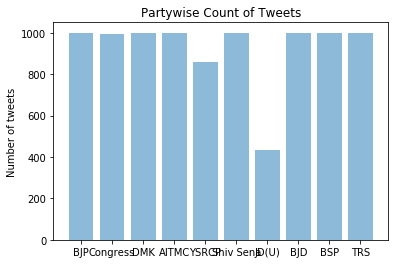

In [34]:
cnt1 = Data_Mixed.query('(candidate == "bjp")').Text.count()
cnt2 = Data_Mixed.query('(candidate == "congress")').Text.count()
cnt3 = Data_Mixed.query('(candidate == "dmk")').Text.count()
cnt4 = Data_Mixed.query('(candidate == "aitmc")').Text.count()
cnt5 = Data_Mixed.query('(candidate == "ysrcp")').Text.count()
cnt6 = Data_Mixed.query('(candidate == "shivsena")').Text.count()
cnt7 = Data_Mixed.query('(candidate == "jdu")').Text.count()
cnt8 = Data_Mixed.query('(candidate == "bjd")').Text.count()
cnt9 = Data_Mixed.query('(candidate == "bsp")').Text.count()
cnt10= Data_Mixed.query('(candidate == "trs")').Text.count()

objects = ('BJP', 'Congress', 'DMK', 'AITMC', 'YSRCP', 'Shiv Sena', 'JD(U)', 'BJD', 'BSP', 'TRS')
y_pos = np.arange(len(objects))
performance = [cnt1, cnt2, cnt3, cnt4, cnt5, cnt6, cnt7, cnt8, cnt9, cnt10]

plt.bar(y_pos, performance, align='center', alpha=0.5, width=0.8)
plt.xticks(y_pos, objects)
plt.ylabel('Number of tweets')
plt.title('Partywise Count of Tweets')

plt.show()